In [1]:
! pip install onnx
! pip install onnx2keras
! pip install onnxruntime

You should consider upgrading via the 'C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


  Using cached onnxruntime-1.13.1-cp39-cp39-win_amd64.whl (5.9 MB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)


  Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)


You should consider upgrading via the 'C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
from torchvision import transforms
_tasks = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])

In [3]:
from torchvision.datasets import MNIST
## Load MNIST Dataset and apply transformations
mnist = MNIST("data", download=True, train=True, transform=_tasks)

In [4]:
from torch.utils.data import DataLoader
rawData = DataLoader(mnist, batch_size=10)
dataiter = iter(rawData)
data, labels = dataiter.next()
data = data.view(data.shape[0], -1)
print("shape", data.shape)

shape torch.Size([10, 784])


In [5]:
data[0][:200]

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

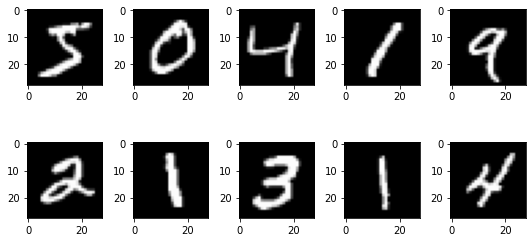

In [6]:
import matplotlib.pyplot as plt

num = 10
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    pixels = data[i].numpy()
    pixels = pixels.reshape((28,28))
    ax.imshow(pixels, cmap='gray')
plt.tight_layout()
plt.show()

In [7]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
## create training and validation split 
split = int(0.8 * len(mnist))
index_list = list(range(len(mnist)))
train_idx, valid_idx = index_list[:split], index_list[split:]
## create sampler objects using SubsetRandomSampler
tr_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(valid_idx)
## create iterator objects for train and valid datasets
trainloader = DataLoader(mnist, batch_size=256, sampler=tr_sampler)
validloader = DataLoader(mnist, batch_size=256, sampler=val_sampler)

In [8]:
import torch.nn.functional as F
import torch.nn as nn
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 128)
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.hidden(x)
        x = F.sigmoid(x)
        x = self.output(x)
        return x
model = Model()

In [9]:
from torch import optim
import numpy as np
import torch
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay= 1e-6, momentum = 0.9, nesterov = True)

In [10]:
for epoch in range(1, 11): ## run the model for 10 epochs
    train_loss, valid_loss = [], []
    ## training part 
    model.train()
    for data, target in trainloader:
        optimizer.zero_grad()
        ## 1. forward propagation
        data = data.view(data.shape[0], -1)
        output = model(data)
        
        ## 2. loss calculation
        loss = loss_function(output, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        train_loss.append(loss.item())
        
    ## evaluation part 
    model.eval()
    for data, target in validloader:
        data = data.view(data.shape[0], -1)
        output = model(data)
        loss = loss_function(output, target)
        valid_loss.append(loss.item())
    print ("Epoch:", epoch, "Training Loss: ", np.mean(train_loss), "Valid Loss: ", np.mean(valid_loss))

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 Training Loss:  1.4488474910563611 Valid Loss:  0.716598224132619
Epoch: 2 Training Loss:  0.5800385521130359 Valid Loss:  0.4456241872716457
Epoch: 3 Training Loss:  0.43132902713532145 Valid Loss:  0.3719490126092383
Epoch: 4 Training Loss:  0.3753798597670616 Valid Loss:  0.33602424917068885
Epoch: 5 Training Loss:  0.34540216775333626 Valid Loss:  0.3130360375693504
Epoch: 6 Training Loss:  0.32436749545183585 Valid Loss:  0.29793212705470146
Epoch: 7 Training Loss:  0.3084932529228799 Valid Loss:  0.28572382476735625
Epoch: 8 Training Loss:  0.29533440033172037 Valid Loss:  0.2762865360746992
Epoch: 9 Training Loss:  0.2842300588938784 Valid Loss:  0.26635559505604683
Epoch: 10 Training Loss:  0.2746959098793091 Valid Loss:  0.2582665222122314


In [11]:
## dataloader for validation dataset 
dataiter = iter(validloader)
data, labels = dataiter.next()
data = data.view(data.shape[0], -1)
output = model(data)
_, preds_tensor = torch.max(output, 1)
pytorchPredictions = np.squeeze(preds_tensor.numpy())

In [33]:
pytorchPredictions

array([4, 1, 3, 8, 4, 5, 9, 5, 5, 3, 6, 8, 8, 0, 6, 3, 9, 7, 8, 5, 5, 0,
       2, 3, 2, 7, 7, 4, 3, 4, 5, 8, 1, 7, 5, 6, 7, 9, 7, 6, 5, 1, 8, 5,
       8, 4, 6, 5, 6, 7, 4, 5, 2, 1, 0, 9, 1, 8, 3, 3, 9, 5, 2, 8, 7, 4,
       7, 5, 6, 3, 5, 8, 4, 4, 7, 6, 8, 6, 9, 9, 4, 7, 7, 6, 5, 4, 9, 1,
       5, 4, 5, 9, 2, 4, 4, 2, 2, 4, 1, 5, 0, 9, 9, 6, 0, 4, 6, 3, 2, 7,
       5, 1, 1, 2, 2, 2, 6, 6, 0, 2, 7, 2, 0, 1, 6, 3, 1, 1, 4, 5, 0, 5,
       1, 2, 4, 9, 2, 2, 9, 4, 2, 0, 5, 6, 1, 4, 9, 5, 7, 3, 9, 1, 3, 3,
       5, 5, 0, 7, 3, 0, 6, 5, 0, 5, 4, 4, 9, 1, 5, 2, 6, 5, 2, 0, 4, 2,
       2, 1, 7, 6, 3, 5, 4, 9, 0, 1, 6, 2, 2, 3, 3, 6, 3, 7, 6, 0, 1, 6,
       6, 9, 8, 8, 1, 2, 1, 9, 1, 3, 4, 7, 6, 5, 0, 2, 5, 2, 9, 3, 1, 3,
       6, 0, 5, 4, 2, 3, 3, 9, 6, 3, 6, 7, 7, 1, 5, 1, 4, 3, 9, 3, 7, 3,
       0, 9, 9, 0, 1, 8, 7, 8, 8, 0, 1, 3, 1, 0], dtype=int64)

In [21]:
import tensorflow as tf

from pt2keras import Pt2Keras
from pt2keras import converter

INFO:onnx:converter:Registering onnx node converter: Sigmoid
INFO:onnx:converter:Registering onnx node converter: Relu
INFO:onnx:converter:Registering onnx node converter: HardSigmoid
INFO:onnx:converter:Registering onnx node converter: Conv
INFO:onnx:converter:Registering onnx node converter: ConvTranspose
INFO:onnx:converter:Registering onnx node converter: Identity
INFO:onnx:converter:Registering onnx node converter: Constant
INFO:onnx:converter:Registering onnx node converter: Add
INFO:onnx:converter:Registering onnx node converter: Mul
INFO:onnx:converter:Registering onnx node converter: Div
INFO:onnx:converter:Registering onnx node converter: Cast
INFO:onnx:converter:Registering onnx node converter: Gather
INFO:onnx:converter:Registering onnx node converter: Dropout
INFO:onnx:converter:Registering onnx node converter: Gemm
INFO:onnx:converter:Registering onnx node converter: MatMul
INFO:onnx:converter:Registering onnx node converter: Pad
INFO:onnx:converter:Registering onnx node 

In [34]:

converter = Pt2Keras()
input_shape = (1, 784)
keras_model: tf.keras.Model = converter.convert(model, input_shape)

# Save the model
keras_model.save('output_model.h5')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
DEBUG:onnx::Graph:NODE::::: %x = Gemm[alpha = 1, beta = 1, transB = 1](%input_0, %hidden.weight, %hidden.bias)
DEBUG:onnx::Graph:NODE::::: %onnx::Gemm_6 = Sigmoid(%x)
DEBUG:onnx::Graph:NODE::::: %output_0 = Gemm[alpha = 1, beta = 1, transB = 1](%onnx::Gemm_6, %output.weight, %output.bias)
INFO:onnx::Graph:Built computational graph: dict_keys(['hidden.weight', 'hidden.bias', 'output.weight', 'output.bias'])
DEBUG:onnx:converter:Converting: Gemm. Node name: Gemm_0
DEBUG:onnx:converter:Node: Gemm_0, op: Gemm. 
onnxruntime speed: 0.0 ms
keras speed: 0.0 ms
INFO:onnx::Graph:Successfully converted: name: Gemm_0: 
	 op type: Gemm
	 input_nodes: ['input_0', 'hidden.weight', 

Inputs: KerasTensor(type_spec=TensorSpec(shape=(1, 784), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [35]:
keras_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(1, 784)]                0         
                                                                 
 dense_4 (Dense)             (1, 128)                  100480    
                                                                 
 activation_2 (Activation)   (1, 128)                  0         
                                                                 
 dense_5 (Dense)             (1, 10)                   1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [36]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(keras_model, 'target')